In [4]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats

fontsize = 13
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
# Organize data

df_488_cond = pd.concat(
    map(
        pd.read_csv, glob.glob("../../data/correlation_analysis/Dataframes_surface_area_new/" + "/condensates_488*.csv")
    )
)
df_488_cond = df_488_cond.drop("Unnamed: 0", axis=1)
df_488_cond["Nucleus ID"] = df_488_cond["Image_name"].str.extract(r"nuc(\d+)").astype(int)
df_488_cond = df_488_cond.sort_values(by=["Nucleus ID"])
df_488_cond["Condition"] = ["Non-Confined" if 1 <= x <= 18 else "Confined" for x in df_488_cond["Nucleus ID"]]

df_488_nuc = pd.concat(
    map(pd.read_csv, glob.glob("../../data/correlation_analysis/Dataframes_surface_area_new/" + "/nuc_488*.csv"))
)
df_488_nuc["Nucleus ID"] = df_488_nuc["Image_name"].str.extract(r"nuc(\d+)").astype(int)
df_488_nuc = df_488_nuc.sort_values(by=["Nucleus ID"])
df_488_nuc = df_488_nuc.drop("Unnamed: 0", axis=1)

df_560_nuc = pd.concat(
    map(pd.read_csv, glob.glob("../../data/correlation_analysis/Dataframes_surface_area_new/" + "/nuc_560*.csv"))
)
df_560_nuc["Nucleus ID"] = df_560_nuc["Image_name"].str.extract(r"nuc(\d+)").astype(int)
df_560_nuc = df_560_nuc.sort_values(by=["Nucleus ID"])
df_560_nuc = df_560_nuc.drop("Unnamed: 0", axis=1)

z_res = 0.24
y_res = 0.1083
x_res = 0.1083

scale_3D = z_res * y_res * x_res
scale_2D = y_res * x_res

df_488_nuc["Volume_scaled"] = df_488_nuc["Volume_nucleus (nm^3)_SITK"] * scale_3D
df_560_nuc["Volume_scaled"] = df_560_nuc["Volume_nucleus (nm^3)_SITK"] * scale_3D

df_488_nuc["Surface_area_scaled"] = df_488_nuc["SurfaceArea"] * scale_2D
df_560_nuc["Surface_area_scaled"] = df_560_nuc["SurfaceArea"] * scale_2D

df_488_nuc["Peripheral_volume"] = df_488_nuc["Size of estimated periphery"] * scale_3D
df_560_nuc["Peripheral_volume"] = df_560_nuc["Size of estimated periphery"] * scale_3D

df_488_nuc["Flatness_"] = 1 - np.sqrt(df_488_nuc["z_length"] / df_488_nuc["x_length"])
df_560_nuc["Flatness_"] = 1 - np.sqrt(df_560_nuc["z_length"] / df_560_nuc["x_length"])

df_488_nuc = df_488_nuc[
    [
        "Image_name",
        "Condition",
        "x_length",
        "y_length",
        "z_length",
        "Flatness_",
        "Volume_scaled",
        "Surface_area_scaled",
        "Peripheral_volume",
        "Sphericity",
        "Mean",
    ]
]
df_488_nuc.columns = [str(col) + "_488" for col in df_488_nuc.columns]

df_560_nuc = df_560_nuc[
    [
        "x_length",
        "y_length",
        "z_length",
        "Flatness_",
        "Volume_scaled",
        "Surface_area_scaled",
        "Peripheral_volume",
        "Sphericity",
        "Mean",
    ]
]
df_560_nuc.columns = [str(col) + "_560" for col in df_560_nuc.columns]

conf_cond = df_488_cond.loc[df_488_cond["Condition"] == "Confined"]
nc_cond = df_488_cond.loc[df_488_cond["Condition"] == "Non-Confined"]

df_488_560_nuc = pd.concat([df_488_nuc, df_560_nuc], axis=1)
df_488_560_nuc = df_488_560_nuc.reset_index()
df_488_560_nuc = df_488_560_nuc.drop("index", axis=1)

df_488_560_nuc = df_488_560_nuc.rename(columns={"Image_name_488": "Image_name"})
df_488_560_nuc = df_488_560_nuc.rename(columns={"Condition_488": "Condition"})

conf = df_488_560_nuc.loc[df_488_560_nuc["Condition"] == "Confined"]
nc = df_488_560_nuc.loc[df_488_560_nuc["Condition"] == "Non-Confined"]

p_agg_min_560_confined = [
    1.7092623769315671,
    2.059866860948376,
    1.6080855820835465,
    2.1883305556654656,
    2.3571678853962426,
    2.085551230425616,
    1.517056693116155,
    1.106349783957538,
    1.246844469125653,
    1.3955647307451582,
    1.5139220343655346,
    1.3269688145663412,
    1.824398477315244,
    1.4736242906504071,
    1.957988251636148,
    2.0669057139898724,
    1.1035599789227994,
    2.3657969016455134,
    2.2713100200277414,
    1.3253898796648336,
    1.367466904390529,
    1.5123220720430796,
    1.7529196169546011,
    1.7787848340240946,
    1.984610289125588,
    1.5188323640099686,
    3.1070930022566658,
    1.652204404239523,
    1.5465486158461663,
    2.1262650704522144,
    1.6521453858290267,
    1.4537989539751588,
    2.07531288705856,
    1.9628018911158245,
    1.2685902148032944,
    0.9217082389179811,
    1.3935605090052132,
    1.5048405060165917,
    1.3540015723301069,
    1.0278521658530917,
    1.4292930794557344,
    1.6550314880192597,
    1.5766560007579933,
    0.6501053075001202,
    2.177194021305224,
    0.713043555110194,
    1.915356889330679,
    1.5982369607542002,
    1.090719308704191,
    1.7696775550131514,
    1.5537123272211042,
    2.1698492674294667,
    1.5887282486805234,
    1.93719257480145,
    1.800569179594398,
    2.2844939499783189,
    1.8297037545619738,
    1.5335184991419843,
    1.2369915490770366,
    1.8511999924942311,
    0.7238133033282702,
    1.0491548420360874,
    1.135127074865273,
    1.3404687284080958,
    2.5313502774410971,
    1.4295539463240627,
    0.995638379625337,
    1.311371391548535,
    1.8581450595136568,
    1.3030192331059536,
    0.8905473303673282,
    1.8004330129268582,
    1.7182549971686631,
    1.4664534558933322,
    1.529359613851219,
    1.3025849171194377,
    1.1540648551645352,
    0.98349439521969,
    1.4938548523273116,
    1.646141777448225,
    0.9286756819701024,
    1.7890195571565332,
    2.6207624549653311,
    1.7978402079975244,
    1.2891982013806262,
    1.422456823900501,
    0.8736214629648115,
    1.8361986461304679,
]

df_488_cond.loc[df_488_cond["Condition"] == "Confined", "p_agg_min_560"] = p_agg_min_560_confined

conf_cond = df_488_cond.loc[df_488_cond["Condition"] == "Confined"]
nc_cond = df_488_cond.loc[df_488_cond["Condition"] == "Non-Confined"]

0.6755160953919611
5.221448232259722e-13
0.9076309173008519
2.948113742007828e-54


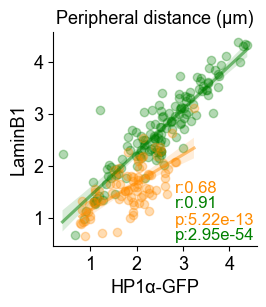

In [8]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "p_agg_min_488"
feature_560 = "p_agg_min_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf_cond[feature_488], conf_cond[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc_cond[feature_488], nc_cond[feature_560])

print(conf_r_cond)
print(conf_p_cond)
print(nc_r_cond)
print(nc_p_cond)

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_cond,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,
    aspect=(fig_height_mm / fig_width_mm),
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.6, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.6, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.6, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.6, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    ylabel="LaminB1",
    title="Peripheral distance (µm)",
)

plt.xticks(np.arange(1, 5, 1.0))

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9H.pdf",
    bbox_inches="tight",
    dpi=300,
)

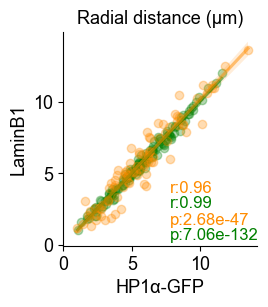

In [9]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "r_agg_dist_488"
feature_560 = "r_agg_dist_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf_cond[feature_488], conf_cond[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc_cond[feature_488], nc_cond[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_cond,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Radial distance (µm)",
)

plt.xticks(np.arange(0, 11, 5.0))


# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9I.pdf",
    bbox_inches="tight",
    dpi=300,
)

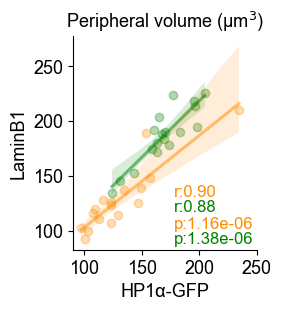

In [10]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "Peripheral_volume_488"
feature_560 = "Peripheral_volume_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf[feature_488], conf[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc[feature_488], nc[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Peripheral volume (µm$^3$)",
)

plt.xticks(np.arange(100, 251, 50.0))

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9C.pdf",
    bbox_inches="tight",
    dpi=300,
)

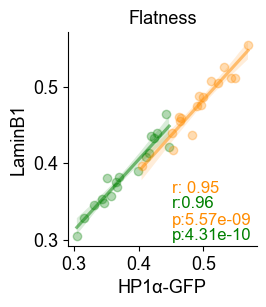

In [11]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "Flatness__488"
feature_560 = "Flatness__560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf[feature_488], conf[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc[feature_488], nc[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r: {conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Flatness",
)

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9G.pdf",
    bbox_inches="tight",
    dpi=300,
)

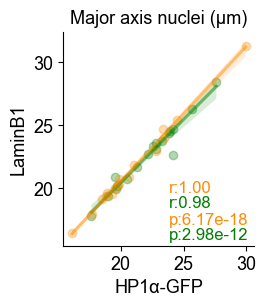

In [12]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "x_length_488"
feature_560 = "x_length_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf[feature_488], conf[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc[feature_488], nc[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Major axis nuclei (µm)",
)

plt.xticks(np.arange(20, 31, 5.0))

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9D.pdf",
    bbox_inches="tight",
    dpi=300,
)

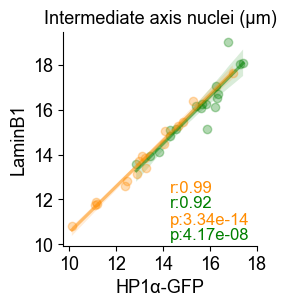

In [13]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4


feature_488 = "y_length_488"
feature_560 = "y_length_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf[feature_488], conf[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc[feature_488], nc[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Intermediate axis nuclei (µm)",
)

plt.xticks(np.arange(10, 19, 2.0))

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9E.pdf",
    bbox_inches="tight",
    dpi=300,
)

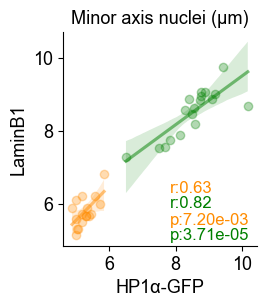

In [14]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4


feature_488 = "z_length_488"
feature_560 = "z_length_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf[feature_488], conf[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc[feature_488], nc[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Minor axis nuclei (µm)",
)

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9F.pdf",
    bbox_inches="tight",
    dpi=300,
)

In [18]:
# volume, different df

df_488_nuc_only = pd.concat(
    map(pd.read_csv, glob.glob("../../data/correlation_analysis/Dataframes_nucleus/" + "/nuc_488*.csv"))
)
df_488_nuc_only["Nucleus ID"] = df_488_nuc_only["Image_name"].str.extract(r"nuc(\d+)").astype(int)
df_488_nuc_only = df_488_nuc_only.sort_values(by=["Nucleus ID"])
df_488_nuc_only = df_488_nuc_only.drop("Unnamed: 0", axis=1)

df_560_nuc_only = pd.concat(
    map(pd.read_csv, glob.glob("../../data/correlation_analysis/Dataframes_nucleus/" + "/nuc_560*.csv"))
)
df_560_nuc_only["Nucleus ID"] = df_560_nuc_only["Image_name"].str.extract(r"nuc(\d+)").astype(int)
df_560_nuc_only = df_560_nuc_only.sort_values(by=["Nucleus ID"])
df_560_nuc_only = df_560_nuc_only.drop("Unnamed: 0", axis=1)

df_488_nuc_only["Volume_scaled"] = df_488_nuc_only["Volume_nucleus (nm^3)_SITK"] * scale_3D
df_560_nuc_only["Volume_scaled"] = df_560_nuc_only["Volume_nucleus (nm^3)_SITK"] * scale_3D

df_488_nuc_only = df_488_nuc_only[
    ["Image_name", "Condition", "x_length", "y_length", "z_length", "Volume_scaled", "Sphericity", "Mean"]
]
df_488_nuc_only.columns = [str(col) + "_488" for col in df_488_nuc_only.columns]

df_560_nuc_only = df_560_nuc_only[["x_length", "y_length", "z_length", "Volume_scaled", "Sphericity", "Mean"]]
df_560_nuc_only.columns = [str(col) + "_560" for col in df_560_nuc_only.columns]

df_488_560_nuc_only = pd.concat([df_488_nuc_only, df_560_nuc_only], axis=1)
df_488_560_nuc_only = df_488_560_nuc_only.reset_index()
df_488_560_nuc_only = df_488_560_nuc_only.drop("index", axis=1)

df_488_560_nuc_only = df_488_560_nuc_only.rename(columns={"Image_name_488": "Image_name"})
df_488_560_nuc_only = df_488_560_nuc_only.rename(columns={"Condition_488": "Condition"})

# nuclei
conf_nuc_only = df_488_560_nuc_only.loc[df_488_560_nuc_only["Condition"] == "Confined"]
nc_nuc_only = df_488_560_nuc_only.loc[df_488_560_nuc_only["Condition"] == "Non-Confined"]

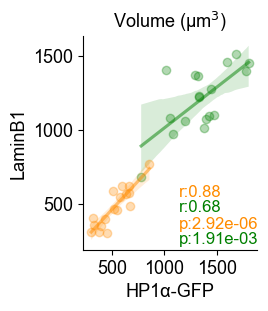

In [19]:
# Specify width and height in millimeters
fig_width_mm = 80
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

feature_488 = "Volume_scaled_488"
feature_560 = "Volume_scaled_560"

# Calculate Pearson's r and p-values
conf_r_cond, conf_p_cond = stats.pearsonr(conf_nuc_only[feature_488], conf_nuc_only[feature_560])
nc_r_cond, nc_p_cond = stats.pearsonr(nc_nuc_only[feature_488], nc_nuc_only[feature_560])

# Create the lmplot with the specified size
my_pal = {"Non-Confined": "green", "Confined": "darkorange"}
g = sns.lmplot(
    data=df_488_560_nuc_only,
    x=feature_488,
    y=feature_560,
    hue="Condition",
    palette=my_pal,
    legend=False,
    height=fig_height_inches,  # Set the height in inches
    aspect=(fig_height_mm / fig_width_mm),  # Calculate aspect ratio based on width and height,
    scatter_kws={"alpha": 0.3},
    line_kws={"alpha": 0.5},
)

# Format p-values to scientific notation with 3 decimal places
conf_p_str = f"{conf_p_cond:.2e}".replace("e", "e")
nc_p_str = f"{nc_p_cond:.2e}".replace("e", "e")

# Add text annotations for Pearson's r and formatted p-values
plt.annotate(f"r:{conf_r_cond:.2f}", xy=(0.55, 0.25), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"r:{nc_r_cond:.2f}", xy=(0.55, 0.18), xycoords="axes fraction", color="green", fontsize=12)
plt.annotate(f"p:{conf_p_str:}", xy=(0.55, 0.1), xycoords="axes fraction", color="darkorange", fontsize=12)
plt.annotate(f"p:{nc_p_str}", xy=(0.55, 0.03), xycoords="axes fraction", color="green", fontsize=12)

# Set x and y labels and title for the lmplot
g.set(
    xlabel="HP1α-GFP",
    # xlabel=None,
    ylabel="LaminB1",
    # ylabel=None,
    title="Volume (µm$^3$)",
)

# Show the plot
plt.show()

g.fig.savefig(
    "../../figures/Supplementary/Suppl_Figure9B.pdf",
    bbox_inches="tight",
    dpi=300,
)